# Data Exploration for Walmart Sales Forecasting

In this notebook we will explore the Walmart sales data to understand its structure, identify key features, and gain initial insights that will guide the rest of the project.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Loading the datasets
features_df = pd.read_csv('../Data/features.csv')
stores_df = pd.read_csv('../Data/stores.csv')
train_df = pd.read_csv('../Data/train.csv')
test_df = pd.read_csv('../Data/test.csv')

# First few rows of each dataset
print("Features DataFrame:")
print(features_df.head())

print("\nStores DataFrame:")
print(stores_df.head())

print("\nTrain DataFrame:")
print(train_df.head())

print("\nTest DataFrame:")
print(test_df.head())


Features DataFrame:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  

Stores DataFrame:
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3 

In [32]:
# Checking data types and missing values
print("Features Data Types and Info:")
print(features_df.info())

print("\nStores Data Types and Info:")
print(stores_df.info())

print("\nTrain Data Types and Info:")
print(train_df.info())

print("\nTest Data Types and Info:")
print(test_df.info())

# Summary statistics
print("\nSummary Statistics for Features DataFrame:")
print(features_df.describe())

print("\nSummary Statistics for Train DataFrame:")
print(train_df.describe())

# Count the number of True and False values in the IsHoliday column
holiday_counts = merged_df['IsHoliday'].value_counts()

# Display the counts
print(holiday_counts)



Features Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB
None

Stores Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

Weekly Sales = Weekly Sales for a given department in a given store

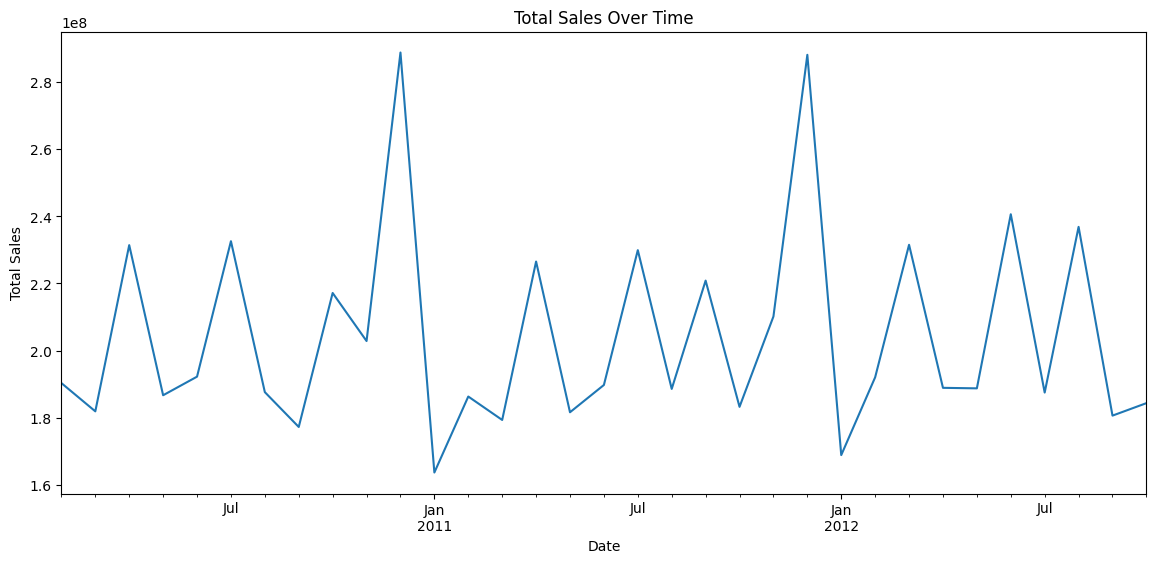

In [13]:
# Converting date to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Aggregating sales to detect seasonal patterns
# By Month
train_df.groupby(train_df['Date'].dt.to_period('M'))['Weekly_Sales'].sum().plot(kind='line', figsize=(14,6))
# By Week
#train_df.groupby(train_df['Date'].dt.to_period('W'))['Weekly_Sales'].sum().plot(kind='line', figsize=(14,6))
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


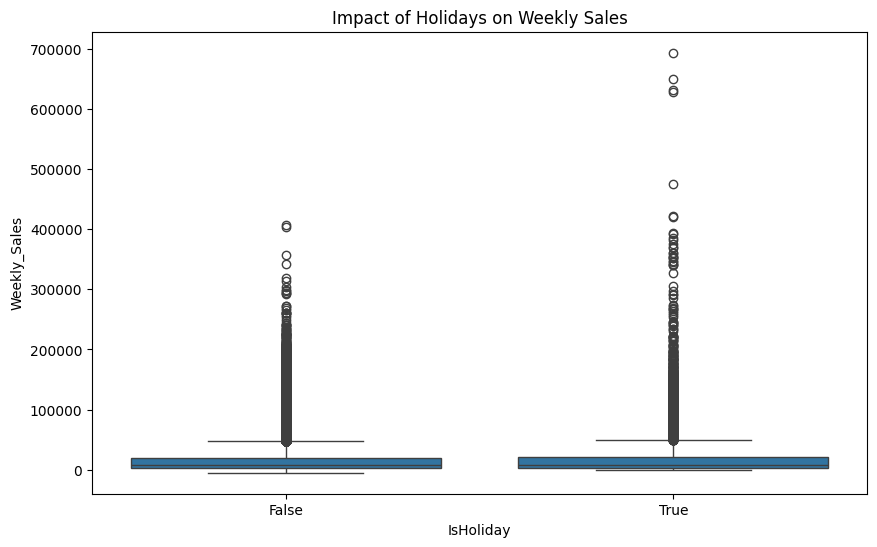

In [28]:
features_df['Date'] = pd.to_datetime(features_df['Date'])

# Merge the train_df and features_df on 'Date' and 'Store'
merged_df = pd.merge(train_df, features_df[['Date', 'Store', 'IsHoliday']], on=['Date', 'Store'], how='left')

# After the merge, there are two IsHoliday columns. We drop one.
merged_df = merged_df.drop(columns=['IsHoliday_y'])

# Optionally rename the remaining 'IsHoliday_x' column for clarity
merged_df = merged_df.rename(columns={'IsHoliday_x': 'IsHoliday'})

# Create a boxplot to visualize the impact of holidays on weekly sales
plt.figure(figsize=(10,6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=merged_df)
plt.title('Impact of Holidays on Weekly Sales')
plt.show()

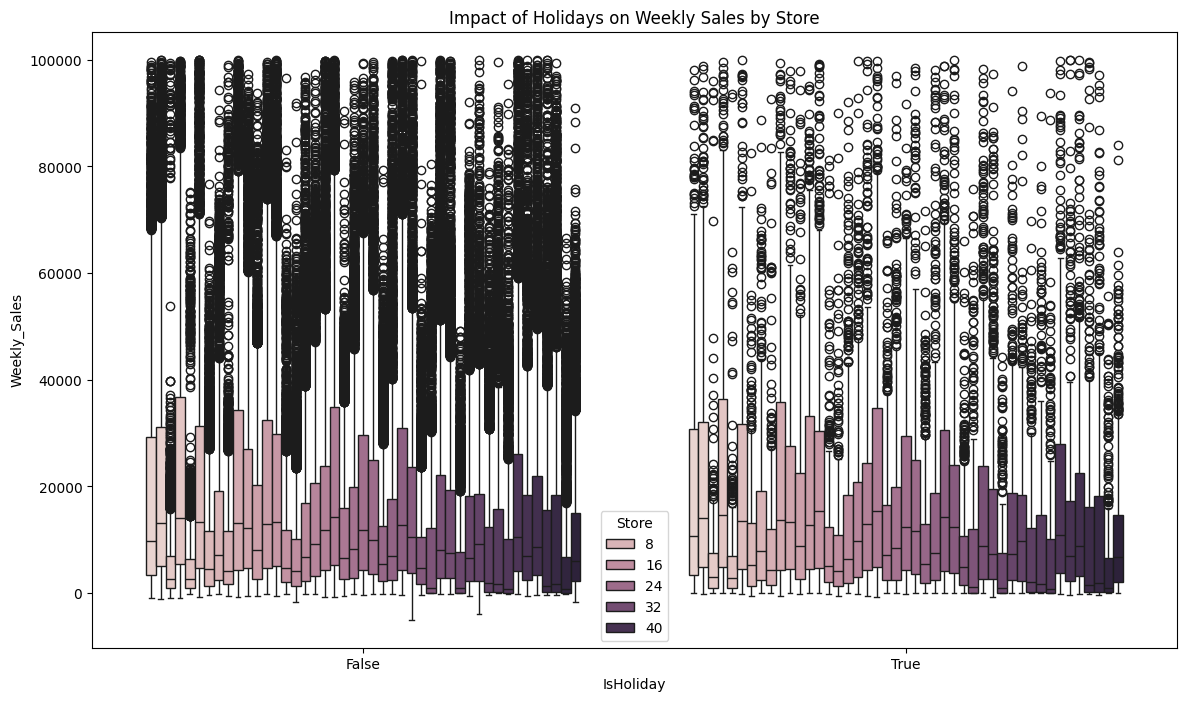

In [31]:
plt.figure(figsize=(14,8))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', hue='Store', data=filtered_df)
plt.title('Impact of Holidays on Weekly Sales by Store')
plt.show()


